In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input

In [2]:
df=pd.read_csv('datasets/bbc_text_cls.csv')

In [3]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [5]:
df['labels'].astype("category").cat.codes

0       0
1       0
2       0
3       0
4       0
       ..
2220    4
2221    4
2222    4
2223    4
2224    4
Length: 2225, dtype: int8

In [6]:
df['target']=df['labels'].astype("category").cat.codes

In [7]:
df_train,df_test=train_test_split(df,test_size=0.3)

In [8]:
tfidf=TfidfVectorizer(stop_words='english')
X_train=tfidf.fit_transform(df_train['text'])
X_test=tfidf.transform(df_test['text'])

In [9]:
y_train=df_train['target']
y_test=df_test['target']

In [11]:
#number of classes
K=df['target'].max()+1
K

5

In [12]:
#input dimesnions
D=X_train.shape[1]
D

25263

In [13]:
#build model
i=Input(shape=(D,))
l1=Dense(256,activation='relu')(i)
x=Dense(K)(l1)

model=Model(i,x)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25263)]           0         
                                                                 
 dense (Dense)               (None, 256)               6467584   
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 6,468,869
Trainable params: 6,468,869
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
X_train=X_train.toarray()
X_test=X_test.toarray()

In [17]:
hist=model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=8, batch_size=128)

Epoch 1/8
13/13 [==============================] - 3s 148ms/step - loss: 1.4696 - accuracy: 0.8221 - val_loss: 1.2210 - val_accuracy: 0.9506
Epoch 2/8
13/13 [==============================] - 1s 98ms/step - loss: 0.9515 - accuracy: 0.9884 - val_loss: 0.7896 - val_accuracy: 0.9701
Epoch 3/8
13/13 [==============================] - 1s 90ms/step - loss: 0.5028 - accuracy: 0.9961 - val_loss: 0.4770 - val_accuracy: 0.9746
Epoch 4/8
13/13 [==============================] - 1s 90ms/step - loss: 0.2402 - accuracy: 0.9987 - val_loss: 0.3045 - val_accuracy: 0.9790
Epoch 5/8
13/13 [==============================] - 1s 90ms/step - loss: 0.1195 - accuracy: 0.9994 - val_loss: 0.2228 - val_accuracy: 0.9775
Epoch 6/8
13/13 [==============================] - 1s 91ms/step - loss: 0.0688 - accuracy: 1.0000 - val_loss: 0.1815 - val_accuracy: 0.9775
Epoch 7/8
13/13 [==============================] - 1s 85ms/step - loss: 0.0447 - accuracy: 1.0000 - val_loss: 0.1576 - val_accuracy: 0.9805
Epoch 8/8
13/13 [==

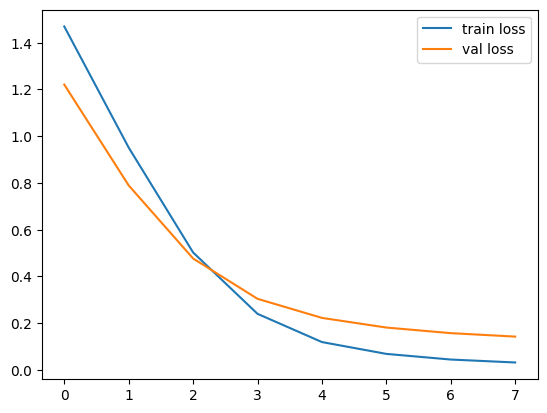

In [18]:
#loss per epoch
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()

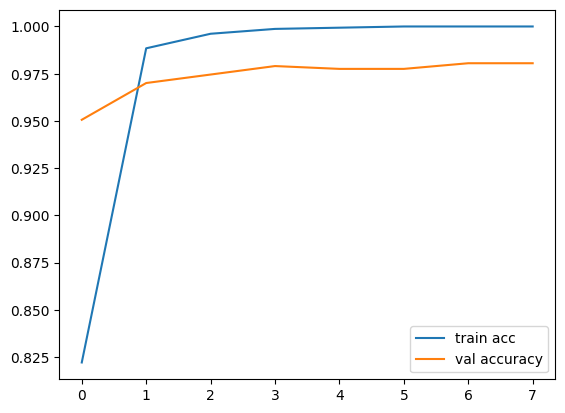

In [19]:
#accuracy per epoch
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val accuracy')
plt.legend()

<AxesSubplot: >

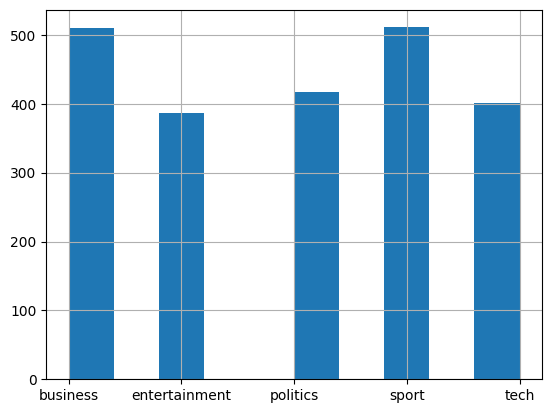

In [20]:
df['labels'].hist()